# PROJETO TITANIC KAGGLE

### Este notebook é uma adaptação de soluções existentes, realizado para fins de estudos. A solução para este código foi realizada com base no livro [Data Science Solutions](https://www.amazon.com/Data-Science-Solutions-Startup-Workflow/dp/1520545312). 

Descrição

## 1) Importando o projeto

In [1]:
import kaggle

In [2]:
!kaggle competitions download -c titanic

titanic.zip: Skipping, found more recently modified local copy (use --force to force download)


In [3]:
import zipfile


In [4]:
with zipfile.ZipFile("C:/Users/vinic/Documents/GitHub/KG_titanic/titanic.zip", 'r') as zip_ref:
    zip_ref.extractall("C:/Users/vinic/Documents/GitHub/KG_titanic/")

## 2) Contextualização do projeto [finalizar]

ETAPAS QUE DEVEM SER APLICADAS (EM ORDEM OU NÃO)

1. Questionamento e definição de problemas;

2. Treinar e testar o DF;

3. Atribuir as téncicas de Data Wrangle, preparar e testar os dados;

4. Analizar, identificar insights e explorar a base de dados;

5. Definir o modelo preditivo e resolver o problema;

6. Aplicar técnicas de visualização de dados, apresentando os passos e a solução final;

7. Submeter os resultados.


Descrição do projeto ["Titanic Survival Competition".](https://www.kaggle.com/c/titanic)

Descrição dos dados ["Titanic Survival Competition - DATA".](https://www.kaggle.com/c/titanic/data)

>O projeto já apresenta um banco de dados para treino do algorítmo de modelo preditivo. Conhecendo esta base, contendo a lista de passageiros que sobreviveu ou não ao desastre do ticanic, o modelo deve determinar no banco de dados quem sobreviveu ou não.

**Informações**:
- On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. Translated 32% survival rate.
- One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.
- Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.




## 3) Introdução

### 3.1)Importando Bibliotecas

In [5]:
# bibliotecas de análise e data wrangling
import pandas as pd
import numpy as np
import random as rnd

# bibliotecas de visualização de dados

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# bibliotecas de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

### 3.2) Aquisição de dados

A biblioteca Pandas foi utilizada para importar os dados e iniciar a tratativa destes.

In [6]:
treino_bd = pd.read_csv(r'C:\Users\vinic\Documents\GitHub\KG_titanic\train.csv')
teste_bd = pd.read_csv(r'C:\Users\vinic\Documents\GitHub\KG_titanic\test.csv')
combine = [treino_bd, teste_bd]

### 3.3) Análise de dados prévia

Essa análise possibilita verificar o nome das colunas. Posteriormente as variáveis (colunas) devem ser avaliadas em variáveis qualitativas ou quantitativas.

 - Variáveis qualitativas nominais (atribuitiva ou binária):
    - PassengerId, Name, Ticket,  Survived, Sex, Cabin Embarked;
 - Variáveis qualitativas ordinais (ordenáveis, geralmente três ou mais categorias):
    - Pclass;
 - Variáveis quantitativas discretas (inteiros):
    - Age, SibSp, Parch.
 - Variáveis quantitativas contínuas (reais):
    - Fare.

In [7]:
treino_bd.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [8]:
treino_bd.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S


#### Verificando se existem dados nulos

In [9]:
treino_bd.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
teste_bd.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
treino_bd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
## Análise em dados quantitativos
treino_bd.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Insighs iniciais

 - A amostra contém 891 observações. Representando 40% do número total de passageiros do Titanic (2.224);

 - Survived é uma categoria que varia entre 0 e 1;

 - Aproximadamente 38% das observações na amostra sobreviveram. Dentre os 2.224, 32% sobreviveram;

 - A maioria dos passageiros (>75%) não viajou com parentes ou filhos;



In [13]:
## Análises em dados qualitativos
treino_bd.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Ibrahim Shawah, Mr. Yousseff",male,1601,G6,S
freq,1,577,7,4,644


#### Premissas para análise de dados, considerando 'survival' como a variável alvo:

 - Correlações interessantes:
    1. Maiores de idade e sobrevivência;
    2. Relacionar embarcados com a sobrevivência;
    
 - Correções:
    1. Provavelmente a coluna Ticket apresenta uma quantidade muito elevada de valores duplicados (uma vez que é o valor da passagem). Como não apresenta uma relação com survival, receberá o comando drop.

    2. Cabin apresenta uma quantidade muito grande de valores null. Como não apresenta uma relação com survival, receberá o comando drop.

    3. PassengerId e Nome não contribui em nada para a interpretação ou para a variável survival, receberá o comando drop.

 - Criação:
   1. Criação de uma nova variável com o nome de 'Family', baseado em Parch e SibSp para obter a contagem total de familiares a bordo;
   2. Classificar e ordenar a variável Age e Fare, para análises.

 - Características dos dados:
   1. (Sex = female) onde a maioria sobreviveu;
   2. Crianças (age < ?) onde a maioria sobreviveu;
   3. Passageiros na primeira classe (Pclass = 1) onde a maioria sobreviveu;



## 4) Análise de Correlações

#### Para a validação das afirmações feitas, algumas análises adicionais de pivotagem podem ser consideradas





In [14]:
treino_bd[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [15]:
treino_bd[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [16]:
treino_bd[["SibSp","Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [17]:
treino_bd[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


Logo, é possível afirmar que:
 - Pclass: existe uma relação significativa (>0.5) para a Pclass = 1;
 
 - Sex: Existe uma correlação muito forte para Sex = female, com 74%; 

 - SibSp e Parch: estes campos apresentam correlação zero para alguns itens, sendo assim, faz mais sentido trabalhar com esses dados de forma individual, categorizando-os.

### 4.1) Análise visual de dados



#### A análise visual possibilita realizar correlações visuais através de plotagem de gráficos e afins.

#### Um histograma possibilita verificar em qual setor (idade) estão concentradas a maior parclea de "survived = 0" e "survived = 1". Esta análise realiza uma correlação entre o fator de "Survived" e "Age", relacionando dados qualitativos e quantitativos.

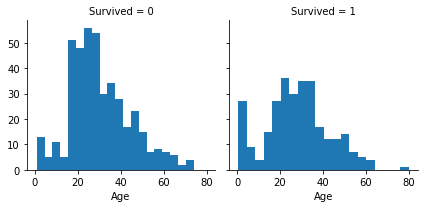

In [18]:
g = sns.FacetGrid(treino_bd, col='Survived')
g.map(plt.hist, 'Age', bins=20)

Conclusões:
 - Crianças de até 4 anos apresentaram uma grande taxa de sobrevivência;
 - Os passageiros mais velhos (80+) sobreviveram;
 - A maior parte das pessoas que não sobreviveram tinham entre 15 e 25 anos.
 - A maior parte dos passageiros tinham entre 15 e 35 anos.

De forma análoga, foi feita uma correlação entre "Pclass" e "Survived":

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


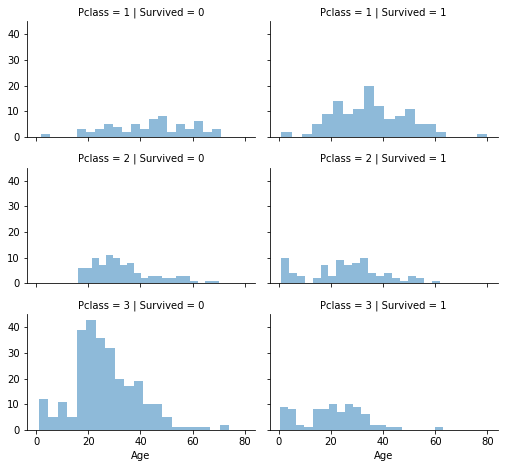

In [19]:

grid = sns.FacetGrid(treino_bd, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

Conclusões:
 - a terceira classe (Pclass = 3) apresentava a maior quantidades de passageiros, apresenta também a maior quantidade de passageiros que não sobreviveram;
 - a maior parte dos sobreviventes foram da primeira classe (Pclass = 1);
 - Pode-se considerar esta variável para treino do modelo.

De forma análoga, foi realizado o estudo para "survived" e "sex":

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:648: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


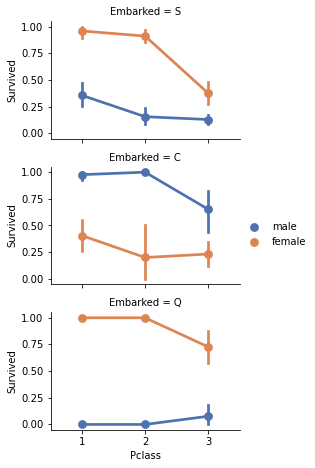

In [20]:
grid = sns.FacetGrid(treino_bd, row='Embarked', size=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette='deep')
grid.add_legend()

Conclusões:
 - Para os passageiros que embarcaram em 'S' e 'Q', a proporção de sobreviventes mulheres é maior;
 - Os passageiros da primeira classe tiveram maior taxa de sobrevivência;
 - Os homens que embarcaram em 'Q' tiveram maior taxa de sobevivência na terceira classe;
  - Devida a correlação, faz sentido adicionar 'sex' ao algorítmo de treino;
  


Realizando uma análise análoga em 'Fare', 'Embarked' e 'Sex'

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


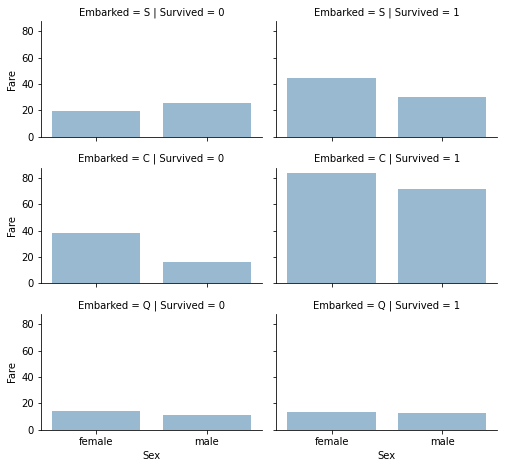

In [21]:
grid = sns.FacetGrid(treino_bd, row='Embarked', col='Survived', size=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha=.5, ci=None)
grid.add_legend()

Conclusões:
 - Passageiros que pagaram mais caro, tiveram maior taxa de sobrevivência;
 

## 5) Data Wrangle

Com base nas decisões feitas nos tópicos acima, nesta etapa os dados teram suas primeiras manipulações.

### 5.1) Correção por 'Dropping', excluindo valores

In [22]:
print("ANTES", treino_bd.shape, teste_bd.shape, combine[0].shape, combine[1].shape)

treino_bd = treino_bd.drop(['Ticket', 'Cabin'], axis=1)
teste_bd = teste_bd.drop(['Ticket', 'Cabin'], axis=1)
combine = [treino_bd, teste_bd]

print("DEPOIS", treino_bd.shape, teste_bd.shape, combine[0].shape, combine[1].shape)


ANTES (891, 12) (418, 11) (891, 12) (418, 11)
DEPOIS (891, 10) (418, 9) (891, 10) (418, 9)


### 5.2) Criação e extração de valores com base nos dados existentes

A primeira análise deste tipo, vai avaliar o nome, possibilitando remover os Pronomes de tratamento, relacionando-os com a taxa de sobrevivência. Antes de remover as variáveis 'Name' e 'PassengerId' por 'Drop'.

O código aplicado, extrai o pronome de tratamento utilizando expressões regulares. O RegEx `(\w+\.)` busca o primeiro caractere identificado como ponto ' . ', extraindo o que vem antes. A parcela `expand = False` trás como produto um DataFrame.

In [23]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(treino_bd['Title'], treino_bd['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Assim, substitui-se os pronomes de tratamento pelos títulos mais comuns ou classificando-os como Raros (`Rare`):

In [24]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
treino_bd[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


É possível ainda converte-los em valores numéricos:


In [25]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

treino_bd.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


Agora, pode-se excluir as variáveis 'Name'e 'passengerId', preservando as informações relacionadas ao nome na coluna 'Title'.

In [26]:
treino_bd = treino_bd.drop(['Name', 'PassengerId'], axis=1)
teste_bd = teste_bd.drop(['Name'], axis=1)
combine = [treino_bd, teste_bd]
treino_bd.shape, teste_bd.shape

((891, 9), (418, 9))

In [27]:
treino_bd.head

<bound method NDFrame.head of      Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked  Title
0           0       3    male  22.0      1      0   7.2500        S      1
1           1       1  female  38.0      1      0  71.2833        C      3
2           1       3  female  26.0      0      0   7.9250        S      2
3           1       1  female  35.0      1      0  53.1000        S      3
4           0       3    male  35.0      0      0   8.0500        S      1
..        ...     ...     ...   ...    ...    ...      ...      ...    ...
886         0       2    male  27.0      0      0  13.0000        S      5
887         1       1  female  19.0      0      0  30.0000        S      2
888         0       3  female   NaN      1      2  23.4500        S      2
889         1       1    male  26.0      0      0  30.0000        C      1
890         0       3    male  32.0      0      0   7.7500        Q      1

[891 rows x 9 columns]>

In [28]:
teste_bd.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,male,34.5,0,0,7.8292,Q,1
1,893,3,female,47.0,1,0,7.0000,S,3
2,894,2,male,62.0,0,0,9.6875,Q,1
3,895,3,male,27.0,0,0,8.6625,S,1
4,896,3,female,22.0,1,1,12.2875,S,3


Convertendo variáveis STRING em valores Numéricos. Este é um pre requisito para a maioria dos algoritmos de machine learning realizarem as análises.

In [29]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

treino_bd.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1
